In [1]:
# ------------------------------
# 📦 1. IMPORTAÇÃO DE BIBLIOTECAS
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

In [2]:
# ------------------------------
# 📁 2. CARREGAMENTO DOS DADOS
# ------------------------------
arquivo = "dados_milho_mg_2023_2024.xlsx"
dados = pd.read_excel(arquivo)

# Visualizar os dados
dados.head()


,Município,Safra,NDVI Médio,Produtividade (kg/ha),Área Colhida (ha),Área Plantada (ha),Quantidade Produzida (ton)
0,Uberlândia,2023/2024,0.76,6821,20189,21129,137709
1,Patos de Minas,2023/2024,0.72,6580,39118,39384,257396
2,Unaí,2023/2024,0.77,7093,55773,56146,395598
3,Paracatu,2023/2024,0.82,6746,21899,22386,147731
4,Sete Lagoas,2023/2024,0.72,6203,21267,21967,131919


In [3]:
# ------------------------------
# 🧹 3. TRATAMENTO BÁSICO DOS DADOS
# ------------------------------
print("Verificando valores nulos:")
print(dados.isnull().sum())

print("\nResumo estatístico:")
print(dados.describe())

Verificando valores nulos:
Município                     0
Safra                         0
NDVI Médio                    0
Produtividade (kg/ha)         0
Área Colhida (ha)             0
Área Plantada (ha)            0
Quantidade Produzida (ton)    0
dtype: int64

Resumo estatístico:
       NDVI Médio  Produtividade (kg/ha)  Área Colhida (ha)  \
count   10.000000              10.000000           10.00000   
mean     0.757000            6704.800000        33937.70000   
std      0.042177             323.933738        14165.18237   
min      0.700000            6203.000000        20189.00000   
25%      0.720000            6539.750000        22313.25000   
50%      0.760000            6663.000000        27642.00000   
75%      0.777500            6967.250000        47834.50000   
max      0.820000            7174.000000        55773.00000   

       Área Plantada (ha)  Quantidade Produzida (ton)  
count           10.000000                   10.000000  
mean         34433.300000          

In [4]:
# ------------------------------
# 📊 4. ANÁLISE DE CORRELAÇÃO
# ------------------------------

# Correlação de Pearson (linear)
pearson_corr, p_pearson = pearsonr(dados["NDVI Médio"], dados["Produtividade (kg/ha)"])
print(f"📈 Correlação de Pearson: {pearson_corr:.2f} (p-valor={p_pearson:.4f})")

# Correlação de Spearman (não linear)
spearman_corr, p_spearman = spearmanr(dados["NDVI Médio"], dados["Produtividade (kg/ha)"])
print(f"📈 Correlação de Spearman: {spearman_corr:.2f} (p-valor={p_spearman:.4f})")


📈 Correlação de Pearson: 0.72 (p-valor=0.0195)
📈 Correlação de Spearman: 0.75 (p-valor=0.0130)


In [5]:
# ------------------------------
# 📉 5. REGRESSÃO LINEAR
# ------------------------------

# Preparação dos dados
X = dados[["NDVI Médio"]]
y = dados["Produtividade (kg/ha)"]

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Parâmetros da regressão
r2 = modelo.score(X, y)
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"\n📐 Regressão Linear: y = {coef:.2f}x + {intercept:.2f}")
print(f"🔎 Coeficiente de Determinação (R²): {r2:.2f}")


📐 Regressão Linear: y = 5511.18x + 2532.84
🔎 Coeficiente de Determinação (R²): 0.51


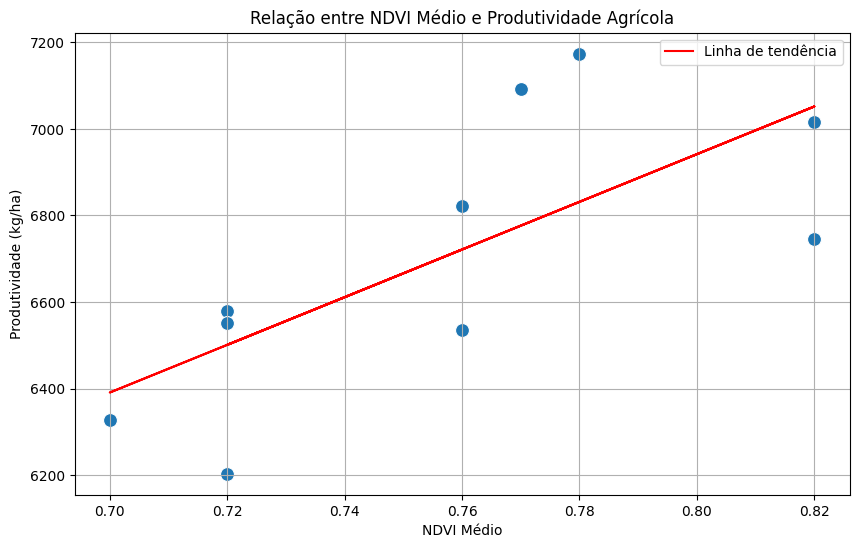

In [6]:
# ------------------------------
# 📈 6. VISUALIZAÇÃO DOS RESULTADOS
# ------------------------------

# Scatter Plot + Linha de Tendência
plt.figure(figsize=(10,6))
sns.scatterplot(x="NDVI Médio", y="Produtividade (kg/ha)", data=dados, s=100)
plt.plot(X, modelo.predict(X), color='red', label='Linha de tendência')
plt.title("Relação entre NDVI Médio e Produtividade Agrícola")
plt.xlabel("NDVI Médio")
plt.ylabel("Produtividade (kg/ha)")
plt.legend()
plt.grid(True)
plt.show()

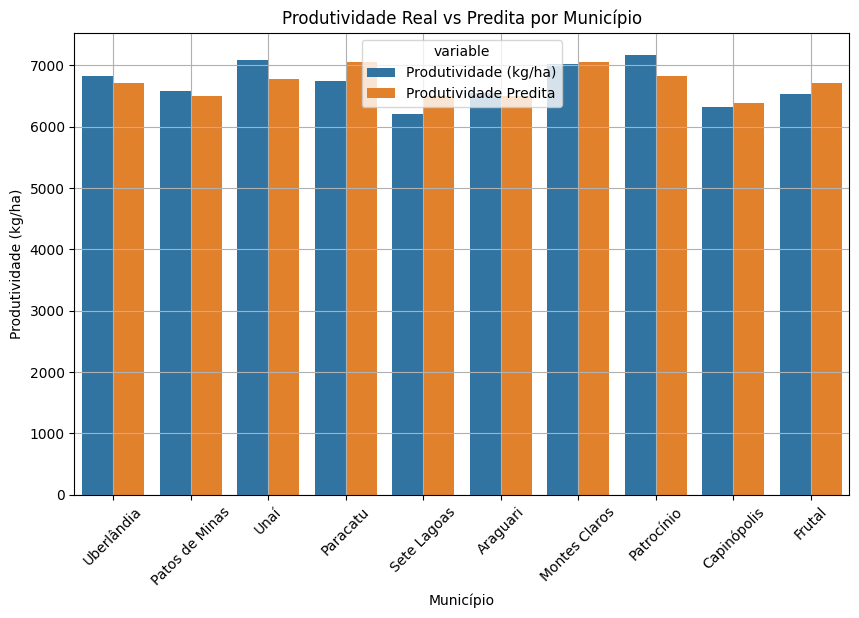

In [7]:
# ------------------------------
# 📉 7. Comparação real x predita
# ------------------------------
dados["Produtividade Predita"] = modelo.predict(X)

plt.figure(figsize=(10,6))
sns.barplot(data=dados.melt(id_vars="Município", value_vars=["Produtividade (kg/ha)", "Produtividade Predita"]),
            x="Município", y="value", hue="variable")
plt.title("Produtividade Real vs Predita por Município")
plt.ylabel("Produtividade (kg/ha)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
# ------------------------------
# 📌 8. INTERPRETAÇÃO SUGERIDA
# ------------------------------
print("\nInterpretação:")
if pearson_corr > 0.7:
    print("- Correlação forte entre NDVI e produtividade. O NDVI é um bom preditor.")
elif pearson_corr > 0.4:
    print("- Correlação moderada. NDVI tem influência razoável, mas pode precisar de ajustes.")
else:
    print("- Correlação fraca. O modelo pode não estar captando bem os padrões.")

if r2 > 0.6:
    print("- O modelo explica bem a variabilidade da produtividade.")
else:
    print("- O modelo pode ser melhorado com mais variáveis ou dados históricos adicionais.")


Interpretação:
- Correlação forte entre NDVI e produtividade. O NDVI é um bom preditor.
- O modelo pode ser melhorado com mais variáveis ou dados históricos adicionais.
